In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt

# Paraliste:
timesteps = 20
dim = 1
dens = 1
rc = 2
birthrate = 0.7
deathrate = 0.2

# Ausgabe aller Indizes
ausgabe = False
saving = False
id = 5

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


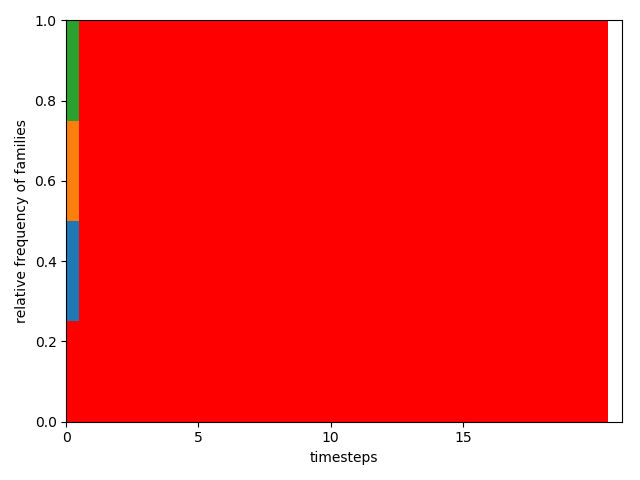

---genealogical research---
number of ancestors:  4
initial density:  1.0
genealogical tree: [2, 0, 0, 0]
max family number is 2 with ancestor cell 1
number of ancestors at beginning: 4
number of living offsprings: 2
number of died cells:  10
number of born cells:  8
---errors?---
---
---
---


In [2]:
# Durchlauf
lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
               density = dens, dims = dim, r_b = birthrate, variation = False, restchannels = rc ,r_d = deathrate)
lgca.timeevo(timesteps, record=True)
%matplotlib notebook
lgca.bar_stacked_relative(save = saving, id = id)
count_fam(lgca)
errors(lgca)

In [4]:
# alle Maße
if ausgabe:
    print('Shannonindex ', entropies(lgca.props_t,1)) 
    print('Simpsonindex ', entropies(lgca.props_t,1.5))
    print('Ginisimpsonindex ', entropies(lgca.props_t,2))
np.save('saved_data/' + 'props_t id=' + str(id), lgca.props_t)
eig = np.load('saved_data/' + 'props_t id=' + str(id) +'.npy')

<IPython.core.display.Javascript object>


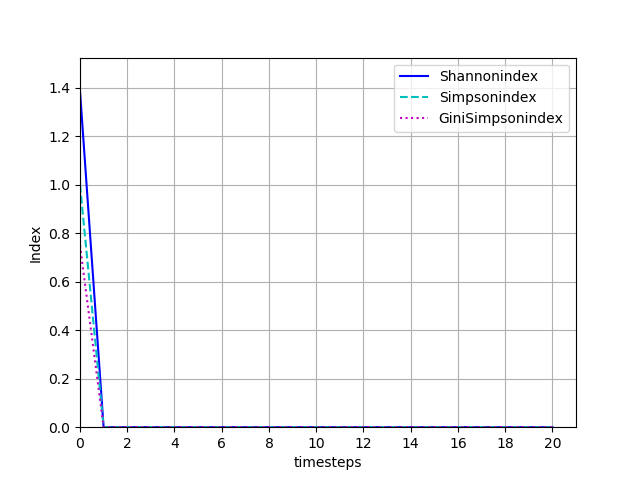

<IPython.core.display.Javascript object>


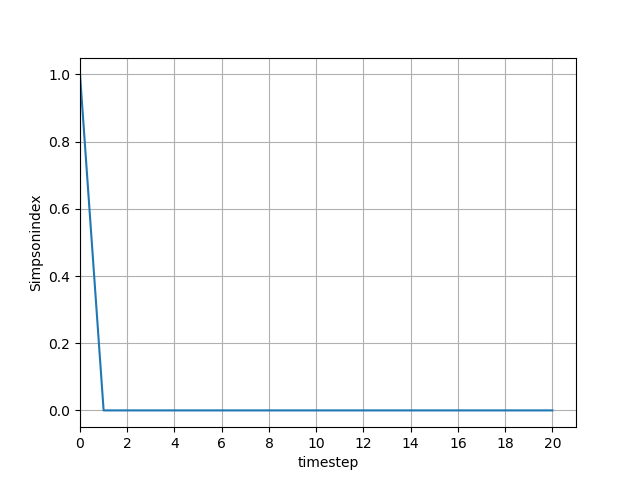

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [5]:
# sh=entropies(lgca.props_t, 1)
# si=entropies(lgca.props_t, 1.5)
# gi=entropies(lgca.props_t, 2)
# print(sh, si, gi)
plot_entropies_together(lgca.props_t, saving)
entropies(eig, 1.5, plot=True)

In [ ]:
if ausgabe:
    print('Hill erster Ordnung ', hillnumber(lgca.props_t,1))
    print('Hill zweiter Ordnung ', hillnumber(lgca.props_t,2))
    print('Hill dritter Ordnung ', hillnumber(lgca.props_t,3))
    
eig

<IPython.core.display.Javascript object>


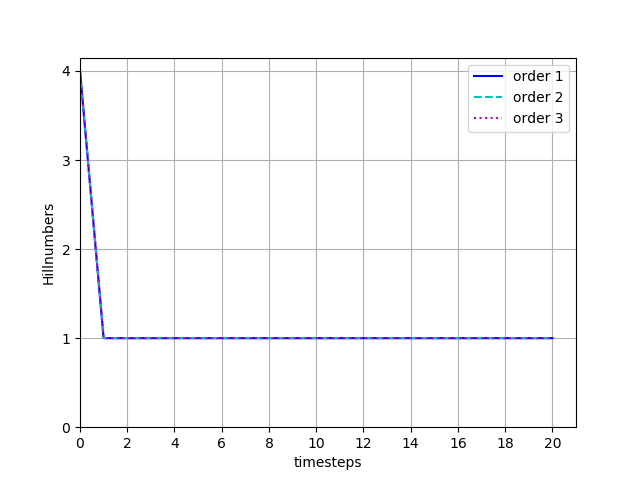

<IPython.core.display.Javascript object>


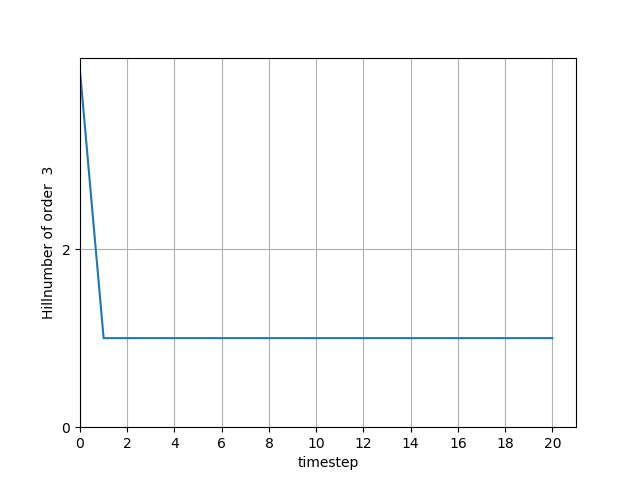

array([4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [6]:
# h1=hillnumber(lgca.props_t, 1)
# h2=hillnumber(lgca.props_t, 2)
# h3=hillnumber(lgca.props_t, 3)
# print(h1, h2, h3)

plot_hill_together(lgca.props_t, saving)
hillnumber(eig, 3, plot=True)

<IPython.core.display.Javascript object>


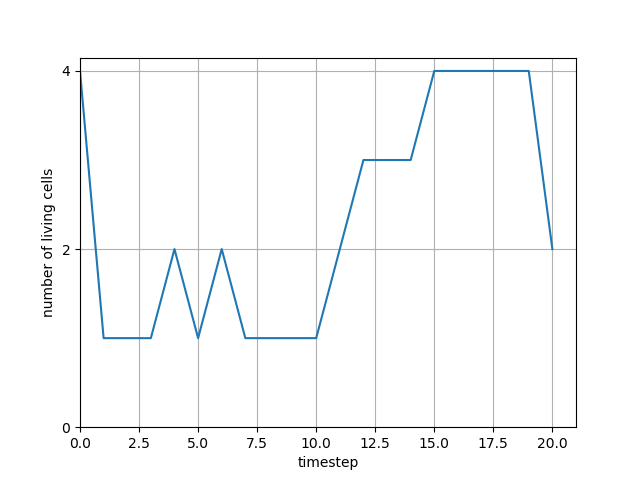

In [3]:
plot_popsize(lgca.props_t)
# for i in range(len(lgca.props_t)):
#     print(i, lgca.props_t[i]['num_off'][1:])
# len(lgca.props_t)